In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
dt1_path = '/Users/lee/Downloads/CA_simulation_data1.csv'
dt2_path = '/Users/lee/Downloads/CA_simulation_data2.csv'
dt3_path = '/Users/lee/Downloads/CA_simulation_data3.csv'
dt4_path = '/Users/lee/Downloads/CA_simulation_data4.csv'
dt5_path = '/Users/lee/Downloads/CA_simulation_data5.csv'
dt6_path = '/Users/lee/Downloads/CA_simulation_data6.csv'

dt1 = pd.read_csv(dt1_path)
dt2 = pd.read_csv(dt2_path)
dt3 = pd.read_csv(dt3_path)
dt4 = pd.read_csv(dt4_path)
dt5 = pd.read_csv(dt5_path)
dt6 = pd.read_csv(dt6_path)


dataframes = [dt1, dt2, dt3, dt4, dt5, dt6]
data = pd.concat(dataframes)

# show the shape of the data
print(data.shape)

# show the first 5 rows of the data
data.head()


(22027, 10)


,Cluster_size,Cluster_count,cell_type,growth_rate_H,growth_rate_I,growth_rate_C,seed,alpha,conditional_entropy,fractal_dimension
0,1.0,15.0,1.0,0.01,0.003,0.0001,4,1.0,8.300142,2.119123
1,2.0,1.0,1.0,0.01,0.003,0.0001,4,1.0,8.300142,2.119123
2,2233.0,1.0,1.0,0.01,0.003,0.0001,4,1.0,8.300142,2.119123
3,1.0,15.0,2.0,0.01,0.003,0.0001,4,1.0,8.300142,2.119123
4,2.0,1.0,2.0,0.01,0.003,0.0001,4,1.0,8.300142,2.119123


In [12]:
# store the data in a csv file
data.to_csv('/Users/lee/Downloads/CA_simulation_data_v1.csv', index=False)

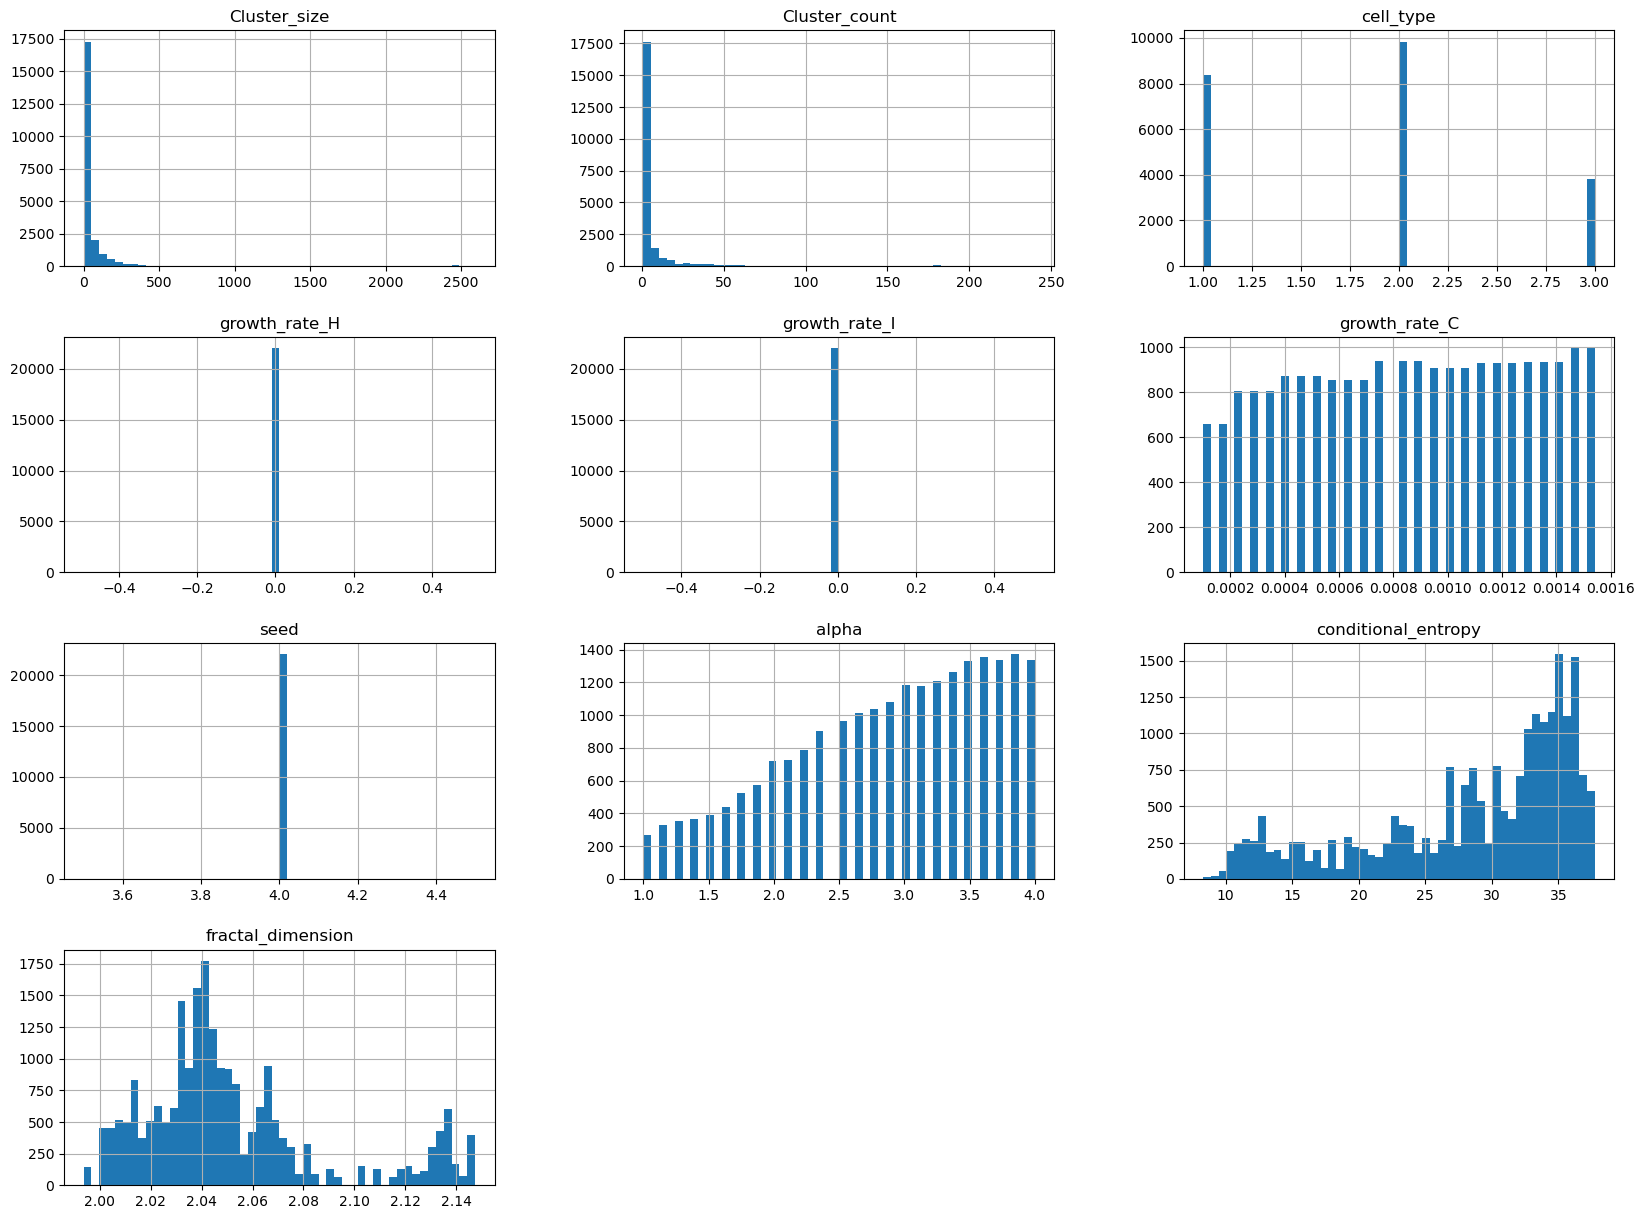

In [13]:
# data visualization
# show the distribution of the data
data.hist(bins=50, figsize=(20,15))
plt.show()


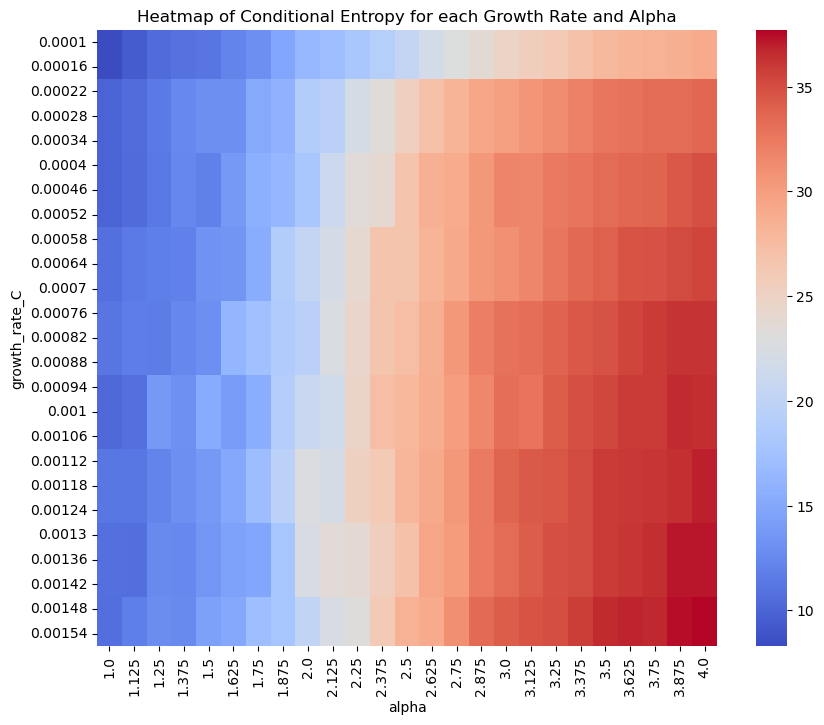

In [6]:
# Group by 'growth_rate_C' and 'alpha' and calculate the mean of 'Cluster_size'
df_mean = data.groupby(['growth_rate_C', 'alpha'])['conditional_entropy'].max().reset_index()

# Pivot the DataFrame
pivot = df_mean.pivot(index='growth_rate_C', columns='alpha', values='conditional_entropy')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, cmap='coolwarm', fmt='.3f')

# Set the title of the plot
plt.title('Heatmap of Conditional Entropy for each Growth Rate and Alpha')

# Display the plot
plt.show()


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

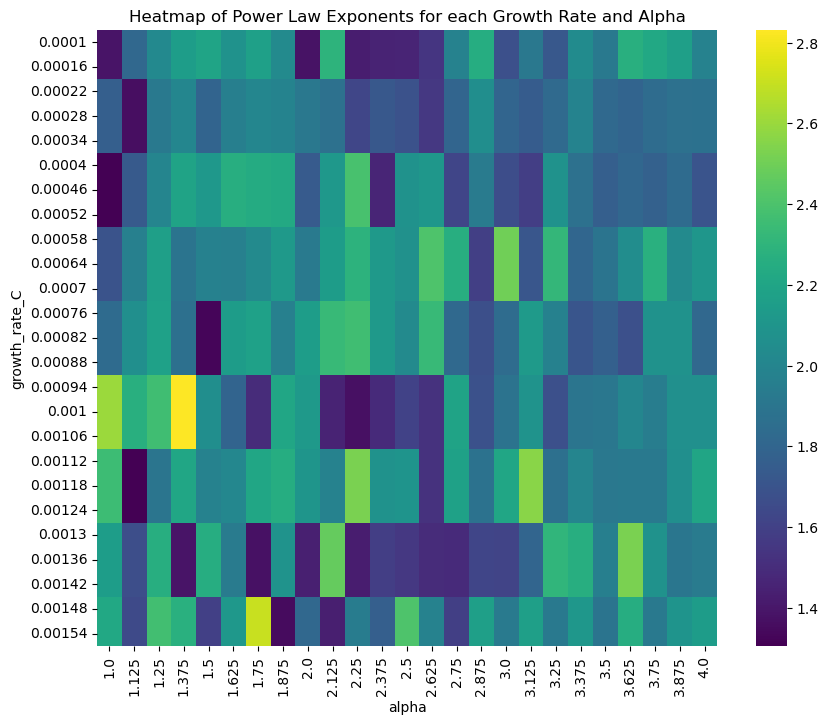

In [11]:
import powerlaw

def power_law_exponent(series):
    fit = powerlaw.Fit(series)
    return fit.alpha

# Group by 'growth_rate_C' and 'alpha', apply power law fitting to 'Cluster_size'
df_exponents = data.groupby(['growth_rate_C', 'alpha'])['Cluster_size'].apply(power_law_exponent).reset_index()

# Filter groups where the power law exponent is greater than 2
df_filtered = df_exponents[df_exponents['Cluster_size'] >0]

# Pivot the DataFrame
pivot = df_filtered.pivot(index='growth_rate_C', columns='alpha', values='Cluster_size')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, cmap='viridis')

# Set the title of the plot
plt.title('Heatmap of Power Law Exponents for each Growth Rate and Alpha')

# Display the plot
plt.show()
